# classical Kmeans

In [1]:
import random
import numpy as np
def Kmeans(data,k,iters,tol):
    #set initial random centers
    df = np.genfromtxt(data, delimiter=',')
    cen_set=[]
    row=df.shape[0]
    col=df.shape[1]
    
    for i in range(k):
        center = random.choice(df)
        cen_set.append(center)

    #core iteration part following
    
    #while (D_set[-1]-D_set[-2]) < tol:
    D_set=[]
    for times in range(iters):        #!!!(unsolved problem)use while loop will cause 'local variable referenced before assignment'
        #if (D_set[times]-D_set[times+1]) < tol:
            #break
        
        dist_set=[]
        # get all the distance from oberservations to centers
        for i in range(row):
            for n in range(k):
                for j in range(col):
                    dist_set.append((df[i][j]-cen_set[n][j])**2)

        Sj=np.array_split(dist_set,row) #get the distance in 2 virablesbetween centres and each point
        min_center_set=[]
        min_dist_set=[]
        #compute the distance between xi and its nearest center
        for i in range(row):
            min_dist_point=float('inf')
            for n in range(k):
                if sum(np.array_split(Sj[i],k)[n]) < min_dist_point:
                    min_center = n+1  
                    min_dist_point = sum(np.array_split(Sj[i],k)[n])  
            min_dist_set.append(min_dist_point)
            min_center_set.append(min_center)
        avg_dist_value = sum(min_dist_set)/row
            

        output_df = np.append(df, np.array(min_center_set).T.reshape(row,1), axis=1)
        cen_set=[]
        #update the centers
        for n in range(k):
            ci_set = output_df[np.where(output_df[:,col]==(n+1))]
            updated_ci = ci_set[:,:col].mean(axis=0)
            cen_set.append(updated_ci)
    
        D_set.append(avg_dist_value)
        
        if len(D_set)==1:
            continue
        elif (D_set[-2]-D_set[-1]) < tol:
            break



    return cen_set,np.array(min_center_set),sum(min_dist_set),D_set

In [2]:
#Plotting the clusters and the centroids 
#Input: X - Data Matrix, Y - Centroids, C - Cluster assignment
from matplotlib import pyplot as plt
def plot_clusters(X, Y, C):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=C)
    plt.plot(Y[:,0],Y[:,1], 'Xr', label = 'Centroids')
    plt.title('K Means Clustering for K = '+ str(len(Y)))
    plt.legend()
    plt.savefig('Results\K_means\Data2_tol2_'+ str(len(Y)))
    plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

X=np.genfromtxt('clustering.csv', delimiter=',')
km = KMeans(n_clusters = 5, random_state = 1).fit(X)
euclidean_distances(km.cluster_centers_)

array([[0.        , 7.35170593, 5.53547388, 2.43295802, 2.52641174],
       [7.35170593, 0.        , 1.88370965, 5.60835313, 5.2904234 ],
       [5.53547388, 1.88370965, 0.        , 3.72618725, 3.7065402 ],
       [2.43295802, 5.60835313, 3.72618725, 0.        , 2.71308978],
       [2.52641174, 5.2904234 , 3.7065402 , 2.71308978, 0.        ]])

In [ ]:
sum(euclidean_distances(km.cluster_centers_))

array([17.84654956, 20.13419211, 14.85191098, 14.48058818, 14.23646513])

### clustering dataset

In [ ]:
Y,C,obcj_v,D_set = Kmeans('clustering.csv',5,100,0.00001)

In [ ]:
Y

[array([ 1.66717627, -0.08271415]),
 array([-0.78755342,  1.21980239]),
 array([4.461261  , 1.88981129]),
 array([-0.75177208, -1.33839292]),
 array([5.35325564, 0.44621782])]

In [ ]:
C

array([4, 4, 2, ..., 5, 5, 3])

In [ ]:
obcj_v

3176.2668534596164

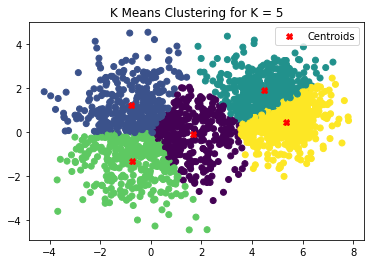

In [ ]:
Y=np.array([Y[0], Y[1], Y[2],Y[3],Y[4]])
X = np.genfromtxt('clustering.csv', delimiter=',')
plot_clusters(X, Y, C)

### Shaped dataset

In [ ]:
Y,C,obcj_v,D_set = Kmeans('ShapedData.csv',4,100,0.00001)

In [ ]:
Y

[array([-0.38157179, -3.48083101]),
 array([ 5.02221541, -0.49046381]),
 array([0.55342828, 0.62239439]),
 array([2.50822746, 4.29537602])]

In [ ]:
C

array([3, 2, 2, ..., 4, 2, 1])

In [ ]:
obcj_v

14319.025272998071

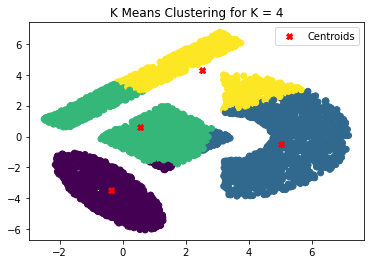

In [ ]:
Y=np.array([Y[0], Y[1], Y[2],Y[3]])
X = np.genfromtxt('ShapedData.csv', delimiter=',')
plot_clusters(X, Y, C)

# Greedy Kmeans

In [ ]:
import random
import numpy as np
def Greedy(data,k):
    df = np.genfromtxt(data, delimiter=',')
    dflist=df.tolist()
    cen_set=[]
    center = random.choice(df)
    cen_set.append(center.tolist())
    dflist=[x for x in dflist if x not in cen_set]

    for i in range(k-1):         
        dist_set=[]
        for i in range(len(dflist)):
            for n in range(len(cen_set)):
                for j in range(len(dflist[0])):
                    dist_set.append((dflist[i][j]-cen_set[n][j])**2)

        Sj=np.array_split(dist_set,len(dflist)*len(cen_set))
        dist_item=[]
        for item in range(len(Sj)):
            dist_item.append(sum(Sj[item]))

        sum_dist_set=np.array_split(dist_item,len(dflist))
        min_dist_set=[min(p) for p in sum_dist_set]

        max_index=min_dist_set.index(max(min_dist_set))
        cen_set.append(dflist[max_index])
        dflist=[x for x in dflist if x not in cen_set]

    #add once more operation to obatain min_dist_set
    sum_dist_set=np.array_split(dist_item,len(dflist))
    min_dist_set=[min(p) for p in sum_dist_set]

    #obtain every point's nearest center
    all_dist_set=[]
    all_dflist = df.tolist()
    for i in range(len(all_dflist)):
        for n in range(len(cen_set)):
            for j in range(len(all_dflist[0])):
                all_dist_set.append((all_dflist[i][j]-cen_set[n][j])**2)

    all_dist_set_new=[]
    for i in range(0,len(all_dist_set),2):
        all_dist_set_new.append(all_dist_set[i]+all_dist_set[i+1])
    Sj=np.array_split(all_dist_set_new,len(all_dflist))
    min_center_set=np.argmin(Sj, axis=1)+1


    return np.array(cen_set),sum(min_dist_set),min_center_set

### clustering dataset

In [ ]:
Q,obcj_v,C = Greedy('clustering.csv',5)

In [ ]:
obcj_v

7220.352445778431

In [ ]:
Q

array([[-0.22323,  1.567  ],
       [ 7.8132 ,  0.51561],
       [ 2.2232 , -4.4286 ],
       [-3.6773 , -3.5965 ],
       [ 4.0893 ,  4.1636 ],
       [ 3.6451 , -0.18324],
       [-4.2148 ,  1.8237 ],
       [-0.41233, -2.1604 ]])

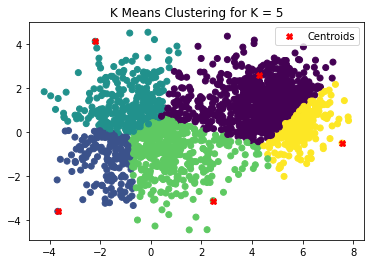

In [ ]:
Y=np.array([Q[0], Q[1], Q[2],Q[3],Q[4]])
X = np.genfromtxt('clustering.csv', delimiter=',')
plot_clusters(X, Y, C)

### Shaped dataset

In [ ]:
Q,obcj_v,C = Greedy('ShapedData.csv',4)

In [ ]:
Q

array([[ 4.6497 ,  2.0511 ],
       [ 0.54923, -6.0252 ],
       [-2.4871 ,  1.1324 ],
       [ 5.33   , -3.2705 ]])

In [ ]:
obcj_v

42871.39220994818

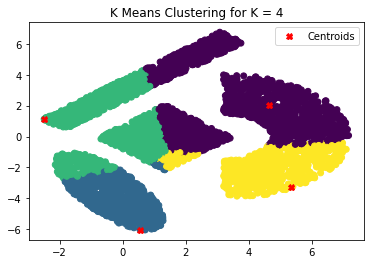

In [ ]:
Y=np.array([Q[0], Q[1], Q[2],Q[3]])
X = np.genfromtxt('ShapedData.csv', delimiter=',')
plot_clusters(X, Y, C)

## single-swap

In [ ]:
import random
import numpy as np
def Singleswap(data,k,tau):
    df = np.genfromtxt(data, delimiter=',')
    dflist=df.tolist()
    cen_set=[]
    center = random.choice(df)
    cen_set.append(center.tolist())
    dflist=[x for x in dflist if x not in cen_set]

    for i in range(k-1):         
        dist_set=[]
        for i in range(len(dflist)):
            for n in range(len(cen_set)):
                for j in range(len(dflist[0])):
                    dist_set.append((dflist[i][j]-cen_set[n][j])**2)

        Sj=np.array_split(dist_set,len(dflist)*len(cen_set))
        dist_item=[]
        for item in range(len(Sj)):
            dist_item.append(sum(Sj[item]))

        sum_dist_set=np.array_split(dist_item,len(dflist))
        min_dist_set=[min(p) for p in sum_dist_set]

        max_index=min_dist_set.index(max(min_dist_set))
        cen_set.append(dflist[max_index])
        dflist=[x for x in dflist if x not in cen_set]

    sum_dist_set=np.array_split(dist_item,len(dflist))
    min_dist_set=[min(p) for p in sum_dist_set]

    # single-swap part
    # swap items in cen_set with dflist/outside of cen_set
    for a in range(len(cen_set)):
        for b in range(len(dflist)):
            TEMP_df = dflist[b].copy()
            dflist[b] = cen_set[a]
            cen_set[a] = TEMP_df
            dist_set=[]
            for i in range(len(dflist)):
                for n in range(len(cen_set)):
                    for j in range(len(dflist[0])):
                        dist_set.append((dflist[i][j]-cen_set[n][j])**2)

            Sj=np.array_split(dist_set,len(dflist)*len(cen_set))
            dist_item=[]
            for item in range(len(Sj)):
                dist_item.append(sum(Sj[item]))

            sum_dist_item=np.array_split(dist_item,len(dflist))
            min_dist_set_updated=[min(p) for p in sum_dist_item]

            #replace Q with Qnew whenever objc_v is reduced by (1-tau)
            if sum(min_dist_set_updated) > (1-tau)*sum(min_dist_set): 
                continue
            else:
                min_dist_set = min_dist_set_updated
                print(np.array(cen_set),sum(min_dist_set))

    #obtain every point's nearest center
    all_dist_set=[]
    all_dflist = df.tolist()
    for i in range(len(all_dflist)):
        for n in range(len(cen_set)):
            for j in range(len(all_dflist[0])):
                all_dist_set.append((all_dflist[i][j]-cen_set[n][j])**2)

    all_dist_set_new=[]
    for i in range(0,len(all_dist_set),2):
        all_dist_set_new.append(all_dist_set[i]+all_dist_set[i+1])
    Sj=np.array_split(all_dist_set_new,len(all_dflist))
    min_center_set=np.argmin(Sj, axis=1)+1

    return np.array(cen_set),sum(min_dist_set),min_center_set

### clustering dataset

In [ ]:
Q,objc_v,C = Singleswap('clustering.csv',5,0.05)

[[-0.027022  0.60813 ]
 [-4.2148    1.8237  ]
 [-0.96307  -3.094   ]
 [ 1.8645    3.882   ]
 [ 7.1976    3.1657  ]] 12766.86312822824
[[ 1.8697   1.3846 ]
 [-4.2148   1.8237 ]
 [-0.96307 -3.094  ]
 [ 1.8645   3.882  ]
 [ 7.1976   3.1657 ]] 11759.47805609608
[[ 2.1957   0.15027]
 [-4.2148   1.8237 ]
 [-0.96307 -3.094  ]
 [ 1.8645   3.882  ]
 [ 7.1976   3.1657 ]] 10722.14972339593
[[ 3.0894    0.090533]
 [-4.2148    1.8237  ]
 [-0.96307  -3.094   ]
 [ 1.8645    3.882   ]
 [ 7.1976    3.1657  ]] 10150.776007996838
[[ 4.4452   0.49081]
 [-4.2148   1.8237 ]
 [-0.96307 -3.094  ]
 [ 1.8645   3.882  ]
 [ 7.1976   3.1657 ]] 9325.238389869506
[[ 4.0792   4.0048 ]
 [ 4.3794   0.76743]
 [ 0.17978 -1.0343 ]
 [ 1.8645   3.882  ]
 [ 7.1976   3.1657 ]] 6049.974208654728
[[ 4.0792   4.0048 ]
 [ 4.3794   0.76743]
 [-0.79447 -0.36758]
 [ 1.8645   3.882  ]
 [ 7.1976   3.1657 ]] 5561.076529500974


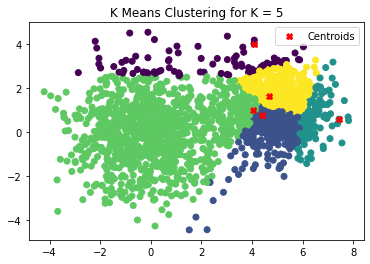

In [ ]:
Y=np.array([Q[0], Q[1], Q[2],Q[3],Q[4]])
X = np.genfromtxt('clustering.csv', delimiter=',')
plot_clusters(X, Y, C)

### Shaped dataset

In [ ]:
Q,objc_v,C = Singleswap('ShapedData.csv',4,0.05)

[[ 2.1865  -1.226  ]
 [ 3.0811   6.7565 ]
 [ 6.9753  -0.41303]
 [-1.9447   1.6681 ]] 30425.120651978435
[[ 1.141   -1.8779 ]
 [ 3.0811   6.7565 ]
 [ 6.9753  -0.41303]
 [-1.9447   1.6681 ]] 26756.30063968078
[[-0.57903 -4.1041 ]
 [ 3.3859   2.0386 ]
 [ 6.9753  -0.41303]
 [-1.9447   1.6681 ]] 25282.10753413625
[[-0.57903 -4.1041 ]
 [ 4.5981   1.1191 ]
 [ 3.2516   3.9068 ]
 [-1.9447   1.6681 ]] 23462.126157271352


In [ ]:
C

array([4, 4, 4, ..., 3, 2, 1])

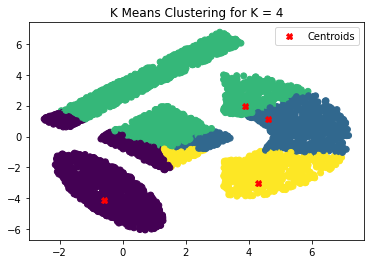

In [ ]:
Y=np.array([Q[0], Q[1], Q[2],Q[3]])
X = np.genfromtxt('ShapedData.csv', delimiter=',')
plot_clusters(X, Y, C)

## Unnormalized spectral clustering

In [3]:
import random
import numpy as np
from numpy import linalg as LA

def Spectral_clus(data,k,iters,tol,sigma):
    #Spectral clustering(refer to the slide)-------------------------------------
    
    #construct similarity metirc
    X = np.genfromtxt(data, delimiter=',')
    number_n = X.shape[0]
    A=np.empty((number_n,number_n),float)
    #the Gaussian similarity function, σ controls the width of the neighborhoods,
    #similiar role as ε in case of the ε-neighborhood graph
    for i in range(number_n):
        for j in range(number_n):
            A[i][j]=np.exp(-sum((X[i]-X[j])**2)/(2.*sigma**2))

    # W--Weighted adjacency matrix
    K_neighbours = 15
    B = np.zeros((A.shape[0], A.shape[1]))
    for i in range(A.shape[0]):
        B[i, (np.argsort(A[i])[::-1])[:K_neighbours+1]] = 1
    W = A*B 

    #define a diagonal matrix D with the entries as row sums of the adjacency matrix
    D=np.empty((number_n,number_n),float)
    for i in range(number_n):
        D[i][i]=sum(W[i])
    
    #compute the first k eigenvectors u1, . . . , uk of L    
    L=D-W
    w,v = LA.eig(L)
    k_smallest = np.argsort(w)[:k]
    #U:the matrix containing the vectors u1, . . . , uk as columns
    U=v[:,k_smallest]
    df=U    

    #classical kmeans algorithm ------------------------------------------------
    
    #set initial random centers
    cen_set=[]
    row=df.shape[0]
    col=df.shape[1]
    
    for i in range(k):
        center = random.choice(df)
        cen_set.append(center)

    #core iteration part following
    
    #while (D_set[-1]-D_set[-2]) < tol:
    D_set=[]
    for times in range(iters):        
        #if (D_set[times]-D_set[times+1]) < tol:
            #break
        
        dist_set=[]
        # get all the distance from oberservations to centers
        for i in range(row):
            for n in range(k):
                for j in range(col):
                    dist_set.append((df[i][j]-cen_set[n][j])**2)

        Sj=np.array_split(dist_set,row) 
        min_center_set=[]
        min_dist_set=[]
        #compute the distance between xi and its nearest center
        for i in range(row):
            min_dist_point=float('inf')
            for n in range(k):
                if sum(np.array_split(Sj[i],k)[n]) < min_dist_point:
                    min_center = n+1  
                    min_dist_point = sum(np.array_split(Sj[i],k)[n])  
            min_dist_set.append(min_dist_point)
            min_center_set.append(min_center)
        avg_dist_value = sum(min_dist_set)/row
            

        output_df = np.append(df, np.array(min_center_set).T.reshape(row,1), axis=1)
        cen_set=[]
        #update the centers
        for n in range(k):
            ci_set = output_df[np.where(output_df[:,col]==(n+1))]
            updated_ci = ci_set[:,:col].mean(axis=0)
            cen_set.append(updated_ci)
    
        D_set.append(avg_dist_value)
        
        if len(D_set)==1:
            continue
        elif (D_set[-2]-D_set[-1]) < tol:
            break
            #return cen_set,np.array(min_center_set),avg_dist_value,D_set
            #return A,U,np.array(min_center_set);

    Y_centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        Y_centers[i] = np.mean([X[j,:] for j in range(X.shape[0]) if min_center_set[j] == i+1 ], axis = 0)

    return A,U,np.array(min_center_set),Y_centers,D_set

### clustering dataset

In [4]:
W,U,C,Y,meanD_set = Spectral_clus('clustering.csv',5,200,1e-5,1)

In [5]:
W

array([[1.00000000e+00, 4.98157339e-01, 1.75060580e-01, ...,
        9.99475017e-13, 2.91948110e-05, 1.52846393e-09],
       [4.98157339e-01, 1.00000000e+00, 7.89357900e-01, ...,
        1.24483905e-15, 8.08092554e-07, 4.90702506e-10],
       [1.75060580e-01, 7.89357900e-01, 1.00000000e+00, ...,
        9.93373800e-18, 4.26580953e-08, 9.33636763e-11],
       ...,
       [9.99475017e-13, 1.24483905e-15, 9.93373800e-18, ...,
        1.00000000e+00, 9.20568138e-03, 1.02291220e-05],
       [2.91948110e-05, 8.08092554e-07, 4.26580953e-08, ...,
        9.20568138e-03, 1.00000000e+00, 5.06529815e-03],
       [1.52846393e-09, 4.90702506e-10, 9.33636763e-11, ...,
        1.02291220e-05, 5.06529815e-03, 1.00000000e+00]])

In [6]:
U

array([[-2.23606798e-02+0.j, -3.30625628e-02+0.j,  2.85722757e-03+0.j,
        -3.00377348e-03+0.j,  3.90273268e-02+0.j],
       [-2.23606798e-02+0.j, -3.38024049e-02+0.j,  6.27022988e-03+0.j,
        -6.05014483e-03+0.j,  9.46202122e-03+0.j],
       [-2.23606798e-02+0.j, -3.41421947e-02+0.j,  9.79855042e-03+0.j,
        -1.05310478e-02+0.j,  7.35000924e-04+0.j],
       ...,
       [-2.23606798e-02+0.j,  6.90097215e-03+0.j,  3.80562572e-02+0.j,
        -5.82712552e-03+0.j, -2.73600422e-04+0.j],
       [-2.23606798e-02+0.j,  6.36999281e-03+0.j, -2.26852761e-02+0.j,
         1.58052708e-02+0.j,  5.59217095e-05+0.j],
       [-2.23606798e-02+0.j,  5.29823298e-03+0.j, -2.15252161e-02+0.j,
        -3.41564414e-02+0.j, -5.58982268e-04+0.j]])

In [7]:
C

array([2, 4, 4, ..., 3, 5, 1])

In [18]:
# get all the distance from oberservations to centers
k=5
X = np.genfromtxt('clustering.csv', delimiter=',')
row=X.shape[0]
col=X.shape[1]

dist_set=[]
for i in range(row):
    for n in range(k):
        for j in range(col):
            dist_set.append((X[i][j]-Y[n][j])**2)

Sj=np.array_split(dist_set,row) 
min_center_set=[]
min_dist_set=[]
#compute the distance between xi and its nearest center
for i in range(row):
    min_dist_point=float('inf')
    for n in range(k):
        if sum(np.array_split(Sj[i],k)[n]) < min_dist_point:
            min_center = n+1  
            min_dist_point = sum(np.array_split(Sj[i],k)[n])  
    min_dist_set.append(min_dist_point)
    min_center_set.append(min_center)
avg_dist_value = sum(min_dist_set)/row

In [19]:
avg_dist_value

1.6698550436788533

In [14]:
Y

array([[ 5.08972393,  1.96797393],
       [-0.17308994, -1.47856298],
       [ 5.72723034,  0.29896749],
       [-0.45023746,  0.92678006],
       [ 3.60191933,  0.53503648]])

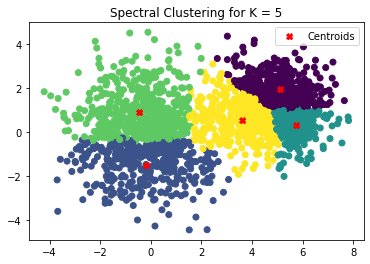

In [9]:
X = np.genfromtxt('clustering.csv', delimiter=',')
plt.figure()
plt.scatter(X[:,0], X[:,1], c=C)
plt.plot(Y[:,0], Y[:,1], 'Xr', label = 'Centroids')
plt.legend()
plt.title('Spectral Clustering for K = '+ str(len(Y)))
plt.savefig('Results\Spectral\Data2_tol2_'+ str(len(Y)))
plt.show()

### Shaped dataset

In [ ]:
W,U,C,Y,meanD_set = Spectral_clus('ShapedData.csv',4,100,1e-7,1)

In [ ]:
W

array([[1.        , 0.73579176, 0.81879944, ..., 0.76922567, 0.7974739 ,
        0.72714286],
       [0.73579176, 1.        , 0.97589547, ..., 0.63626274, 0.76154459,
        0.40004395],
       [0.81879944, 0.97589547, 1.        , ..., 0.62357065, 0.73680448,
        0.52446495],
       ...,
       [0.76922567, 0.63626274, 0.62357065, ..., 1.        , 0.97577312,
        0.32064595],
       [0.7974739 , 0.76154459, 0.73680448, ..., 0.97577312, 1.        ,
        0.33902214],
       [0.72714286, 0.40004395, 0.52446495, ..., 0.32064595, 0.33902214,
        1.        ]])

In [ ]:
U

array([[ 1.32253164e-03+0.j,  2.96443036e-02+0.j, -1.35590123e-03+0.j,
         3.63133197e-04+0.j],
       [ 2.99616157e-04+0.j, -4.46399878e-04+0.j,  9.93003412e-05+0.j,
        -2.14864225e-04+0.j],
       [ 2.41080773e-04+0.j, -5.79083647e-04+0.j,  4.73497694e-04+0.j,
         1.15402446e-04+0.j],
       ...,
       [ 2.01232311e-04+0.j,  3.81639573e-04+0.j,  3.38296227e-04+0.j,
        -6.81434280e-05+0.j],
       [ 2.71764580e-04+0.j,  2.92771101e-04+0.j,  6.90903712e-04+0.j,
        -8.34799600e-05+0.j],
       [ 1.66415943e-03+0.j, -2.75261266e-03+0.j, -7.41626157e-05+0.j,
        -3.40486907e-02+0.j]])

In [ ]:
C

array([3, 4, 4, ..., 4, 4, 1])

In [ ]:
Y

array([[-0.43282777, -3.531065  ],
       [-0.47928233,  2.52943985],
       [ 1.35353385, -0.06245563],
       [ 4.41437098,  1.17664505]])

In [22]:
# get all the distance from oberservations to centers
k=4
X = np.genfromtxt('ShapedData.csv', delimiter=',')
row=X.shape[0]
col=X.shape[1]

dist_set=[]
for i in range(row):
    for n in range(k):
        for j in range(col):
            dist_set.append((X[i][j]-Y[n][j])**2)

Sj=np.array_split(dist_set,row) 
min_center_set=[]
min_dist_set=[]
#compute the distance between xi and its nearest center
for i in range(row):
    min_dist_point=float('inf')
    for n in range(k):
        if sum(np.array_split(Sj[i],k)[n]) < min_dist_point:
            min_center = n+1  
            min_dist_point = sum(np.array_split(Sj[i],k)[n])  
    min_dist_set.append(min_dist_point)
    min_center_set.append(min_center)
avg_dist_value = sum(min_dist_set)/row

In [23]:
avg_dist_value

4.728185308013998

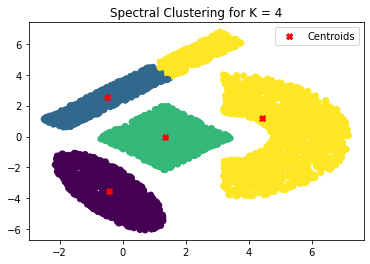

In [ ]:
X = np.genfromtxt('ShapedData.csv', delimiter=',')
plt.figure()
plt.scatter(X[:,0], X[:,1], c=C)
plt.plot(Y[:,0], Y[:,1], 'Xr', label = 'Centroids')
plt.legend()
plt.title('Spectral Clustering for K = '+ str(len(Y)))
plt.savefig('Results\Spectral\Data2_tol2_'+ str(len(Y)))
plt.show()